In [2]:
# Import basic modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
import holidays
import geohash2 as geohash

## Cross checking the given time

Conclusion: all the given order time in the data is UTC+0, while taiwan is UTC+8 therefore all the time should be moved by 8 hours forward.

In [ ]:
data_train_se = pd.read_csv('Data/orders_se_train.txt', delimiter = ',')
data_train_se['day'] = data_train_se['order_day'].apply(lambda x: int(x.split(' ')[0]))
data_train_se['order_time'] = pd.to_datetime(data_train_se['order_time'])
data_train_se['hour'] = data_train_se['order_time'].dt.hour
data_train_se['total_items'] = data_train_se.groupby(['customer_id','geohash','vendor_id','day','day_of_week','hour'])['order_id'].transform('sum')
del data_train_se['product_id']
del data_train_se['Unnamed: 0']
data_train_se = data_train_se.drop_duplicates()
data_train_se.head()

C:\Users\jcheng3\AppData\Local\Temp\ipykernel_10084\2570354132.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data_train_se['order_time'] = pd.to_datetime(data_train_se['order_time'])


,customer_id,geohash,order_id,vendor_id,day_of_week,order_time,order_day,day,hour,total_items
0,90a4e98622,u6sc4,0,e1f3e4a4,3,2024-05-03 16:00:16,11 days,11,16,0
2,90a4e98622,u6sc4,1,5d1b1300,1,2024-05-03 16:34:04,51 days,51,16,1
3,90a4e98622,u6sc4,3,5d1b1300,3,2024-05-03 16:23:14,53 days,53,16,3
4,90a4e98622,u6sc4,4,4790e97d,2,2024-05-03 15:34:13,66 days,66,15,4
5,90a4e98622,u6sc4,5,2ebe1498,6,2024-05-03 16:38:57,49 days,49,16,5


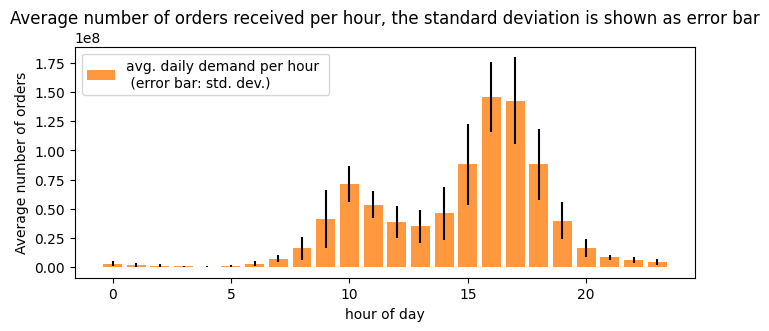

In [ ]:
'plot the weekly demand pattern of all vendor grids'
series_3 = data_train_se.groupby(['day','hour'])['order_id'].sum().reset_index()
series_3.columns = ['day','hour','order_count']
series_4 = series_3.groupby(['hour'])['order_count'].mean().reset_index()
series_4.columns = ['hour','mean_order_count']
series_5 = series_3.groupby(['hour'])['order_count'].std().reset_index()
series_5.columns = ['hour','std_order_count']
fig, ax = plt.subplots(figsize=(8, 3))
# day_order = ['Mon.','Tue.','Wed.','Thu.','Fri.','Sat.','Sun.']
plt.bar(series_4.hour, series_4.mean_order_count, alpha=0.8, yerr = series_5.std_order_count, color='tab:orange', label= 'avg. daily demand per hour \n (error bar: std. dev.)')
# plt.xticks(rotation=-45)
plt.xlabel('hour of day')
plt.ylabel('Average number of orders')
plt.title('Average number of orders received per hour, the standard deviation is shown as error bar')
plt.legend(loc='upper left')
plt.show()

# Data transform

In [33]:
data_train = pd.read_csv('Data/orders_tw_train.txt', delimiter = ',')
data_test = pd.read_csv('Data/orders_tw_test.txt', delimiter = ',')
data_vendors = pd.read_csv('Data/vendors_tw.txt', delimiter = ',')

In [34]:
'Move all the order_time data by 8 hours forward to match the local time in Taiwan'
data_train['order_time'] = pd.to_datetime(data_train['order_time'])
data_train['order_time'] = data_train['order_time'] + pd.Timedelta(hours=8)
data_test['order_time'] = pd.to_datetime(data_test['order_time'])
data_test['order_time'] = data_test['order_time'] + pd.Timedelta(hours=8)

C:\Users\jcheng3\AppData\Local\Temp\ipykernel_24304\2060140377.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data_train['order_time'] = pd.to_datetime(data_train['order_time'])
C:\Users\jcheng3\AppData\Local\Temp\ipykernel_24304\2060140377.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data_test['order_time'] = pd.to_datetime(data_test['order_time'])


In [35]:
print('length of training data',len(data_train))
data_train.head()

length of training data 3753168


,Unnamed: 0,customer_id,geohash,order_id,vendor_id,product_id,day_of_week,order_time,order_day
0,0,900f8054db,wsqqe,0,63e62dc1,51474e8ecf99,5,2024-05-17 19:03:01,55 days
1,1,900f8054db,wsqqe,0,63e62dc1,7576b2eab768,5,2024-05-17 19:03:01,55 days
2,2,900f8054db,wsqqe,1,f15fbae2,1452f0fd3ada,6,2024-05-17 11:13:21,35 days
3,3,900f8054db,wsqqe,1,f15fbae2,1f3e3644c180,6,2024-05-17 11:13:21,35 days
4,4,900f8054db,wsqqe,1,f15fbae2,8b995e631939,6,2024-05-17 11:13:21,35 days


In [36]:
print('length of testing data', len(data_test))
data_test.head()

length of testing data 828178


,Unnamed: 0,customer_id,geohash,order_id,vendor_id,product_id,day_of_week,order_time,order_day
0,16,5cfa9b4775,wsqqt,3,16907f39,b96dbd609ff2,4,2024-05-17 12:48:04,89 days
1,17,5cfa9b4775,wsqqt,3,16907f39,7c224b736b14,4,2024-05-17 12:48:04,89 days
2,19,babfe111b2,wsqqm,5,d1ae140d,fcc1eea4a9bd,0,2024-05-17 15:12:11,85 days
3,49,162036b460,wsqqt,14,c9d99270,a858af19e1ad,2,2024-05-17 18:15:00,80 days
4,50,162036b460,wsqqt,14,c9d99270,9a27178a686b,2,2024-05-17 18:15:00,80 days


In [37]:
print('length of vendor information data', len(data_vendors))
data_vendors.head()

length of vendor information data 9506


,Unnamed: 0,vendor_id,chain_id,geohash,primary_cuisine
0,1,3cb8b730,NaN,wsqqg,小吃
1,5,ecf6ea82,NaN,wsqqg,小吃
2,7,bfbdeb8a,NaN,wsqqr,台式
3,12,ae2bec5b,3823147c,wsqqg,台式
4,13,461fb860,NaN,wsqqp,歐美


In [38]:
# Check if each column has NaN values
# nan_in_columns = data_vendors.isna().any()
# nan_in_columns = data_train.isna().any()
nan_in_columns = data_test.isna().any()
nan_in_columns

Unnamed: 0     False
customer_id    False
geohash        False
order_id       False
vendor_id      False
product_id     False
day_of_week    False
order_time     False
order_day      False
dtype: bool

In [39]:
'find vendor geohash location for each order'
data_vendors = data_vendors[['vendor_id','geohash']]
data_vendors.columns = ['vendor_id','vendor_geohash']
data_train = pd.merge(data_train, data_vendors, on = ['vendor_id'], how = 'left')
data_test = pd.merge(data_test, data_vendors, on = ['vendor_id'], how = 'left')

## Basic data analysis and (NaN) filtering

In [40]:
# Check if each column has NaN values
nan_in_columns = data_train.isna().any()
nan_in_columns

Unnamed: 0        False
customer_id       False
geohash           False
order_id          False
vendor_id         False
product_id        False
day_of_week       False
order_time        False
order_day         False
vendor_geohash    False
dtype: bool

In [41]:
# Check if each column has NaN values
nan_in_columns = data_test.isna().any()
nan_in_columns

Unnamed: 0        False
customer_id       False
geohash           False
order_id          False
vendor_id         False
product_id        False
day_of_week       False
order_time        False
order_day         False
vendor_geohash    False
dtype: bool

In [42]:
print('number of customer in training data',len(data_train['customer_id'].unique()))
print('number of geohash in training data',len(data_train['geohash'].unique()))
print('number of vendor geohash in training data',len(data_train['vendor_geohash'].unique()))
print('number of vendor in training data',len(data_train['vendor_id'].unique()))
print('number of day in training data',len(data_train['order_day'].unique()))
print('number of order in training data',len(data_train['order_id'].unique()))
print('number of day of a week in training data',len(data_train['day_of_week'].unique()))

number of customer in training data 669194
number of geohash in training data 81
number of vendor geohash in training data 27
number of vendor in training data 9262
number of day in training data 76
number of order in training data 1643492
number of day of a week in training data 7


In [43]:
print('number of customer in testing data',len(data_test['customer_id'].unique()))
print('number of geohash in testing data',len(data_test['geohash'].unique()))
print('number of vendor geohash in testing data',len(data_test['vendor_geohash'].unique()))
print('number of vendor in testing data',len(data_test['vendor_id'].unique()))
print('number of day in testing data',len(data_test['order_day'].unique()))
print('number of order in testing data',len(data_test['order_id'].unique()))
print('number of day of a week in testing data',len(data_test['day_of_week'].unique()))


number of customer in testing data 240077
number of geohash in testing data 68
number of vendor geohash in testing data 27
number of vendor in testing data 9356
number of day in testing data 14
number of order in testing data 356508
number of day of a week in testing data 7


In [44]:
def check_unique_and_common(data_train, data_test, var_name = 'vendor_id' ):
    print('\n {var_name} \n'.format(var_name = var_name))
    train_attributes = data_train[var_name].unique().tolist()
    test_attributes = data_test[var_name].unique().tolist()

    train_attributes_set = set(train_attributes)
    test_attributes_set = set(test_attributes)

    # Find the vendor_ids unique to the training set
    unique_to_train_set = train_attributes_set - test_attributes_set
    print(f'length of unique to training data [{var_name}] :',len(unique_to_train_set))
    # Find the vendor_ids unique to the testing set
    unique_to_test_set = test_attributes_set - train_attributes_set
    print(f'length of unique to testing dataset [{var_name}] :',len(unique_to_test_set))
    # Find the vendor_ids that appear in both lists
    common_to_both = train_attributes_set & test_attributes_set
    print(f'length of common to both dataset: [{var_name}] :',len(common_to_both))

check_unique_and_common(data_train, data_test, var_name = 'customer_id' )
check_unique_and_common(data_train, data_test, var_name = 'geohash' )
check_unique_and_common(data_train, data_test, var_name = 'vendor_id' )
check_unique_and_common(data_train, data_test, var_name = 'order_day' )


 customer_id 

length of unique to training data [customer_id] : 500976
length of unique to testing dataset [customer_id] : 71859
length of common to both dataset: [customer_id] : 168218

 geohash 

length of unique to training data [geohash] : 14
length of unique to testing dataset [geohash] : 1
length of common to both dataset: [geohash] : 67

 vendor_id 

length of unique to training data [vendor_id] : 150
length of unique to testing dataset [vendor_id] : 244
length of common to both dataset: [vendor_id] : 9112

 order_day 

length of unique to training data [order_day] : 76
length of unique to testing dataset [order_day] : 14
length of common to both dataset: [order_day] : 0


In [45]:
'create a new column called total_items, using groupby function'
data_train['total_items'] = data_train.groupby(['customer_id','geohash','vendor_id','vendor_geohash','order_day','day_of_week','order_time'])['order_id'].transform('sum')
del data_train['product_id']
del data_train['Unnamed: 0']
data_train = data_train.drop_duplicates()
print(len(data_train))
data_train.head(2)

1643492


,customer_id,geohash,order_id,vendor_id,day_of_week,order_time,order_day,vendor_geohash,total_items
0,900f8054db,wsqqe,0,63e62dc1,5,2024-05-17 19:03:01,55 days,wsqqe,0
2,900f8054db,wsqqe,1,f15fbae2,6,2024-05-17 11:13:21,35 days,wsqqe,7


In [46]:
'create a new column called total_items, using groupby function'
data_test['total_items'] = data_test.groupby(['customer_id','geohash','vendor_id','order_day','day_of_week','order_time'])['order_id'].transform('sum')
del data_test['product_id']
del data_test['Unnamed: 0']
data_test = data_test.drop_duplicates()
print(len(data_test))
data_test.head(2)

356508


,customer_id,geohash,order_id,vendor_id,day_of_week,order_time,order_day,vendor_geohash,total_items
0,5cfa9b4775,wsqqt,3,16907f39,4,2024-05-17 12:48:04,89 days,wsqqm,6
2,babfe111b2,wsqqm,5,d1ae140d,0,2024-05-17 15:12:11,85 days,wsqqm,5


In [47]:
data_test['day'] = data_test['order_day'].apply(lambda x: int(x.split(' ')[0]))
data_train['day'] = data_train['order_day'].apply(lambda x: int(x.split(' ')[0]))

In [48]:
wd_dict ={}
for day in data_train.day.unique():
    df_train_ = data_train[data_train['day'] == day]
    weekday_array = df_train_.day_of_week.unique()
    if len(weekday_array) == 1:
        wd_dict[day] = weekday_array[0]
# wd_dict

In [49]:
wd_dict_2 ={}
for day in data_test.day.unique():
    data_test_ = data_test[data_test['day'] == day]
    weekday_array = data_test_.day_of_week.unique()
    if len(weekday_array) == 1:
        wd_dict_2[day] = weekday_array[0]
    else:
        print(weekday_array)
# wd_dict_2

In [52]:
'I will transform the data_train and data_test data into new dataframes that denote the number of orders received per 15min on different days'
def transform_demand_per15min(data):
    # data['order_time'] = pd.to_datetime(data['order_time'])
    data['hour'] = data['order_time'].dt.hour
    data['per_15min'] = data['order_time'].dt.minute // 15
    print(data.columns)
    data = data.groupby(['vendor_geohash','day','day_of_week','hour','per_15min'])['order_id'].count().reset_index()
    return data

In [54]:
data_train_15min = transform_demand_per15min(data_train)
print(data_train_15min.columns)
# data_train_15min.columns = ['vendor_geohash','day','day_of_week','hour','per_15min','order_count']
# data_train_15min = data_train_15min.sort_values(by = ['geohash','order_day','day_of_week','per_15min'])

Index(['customer_id', 'geohash', 'order_id', 'vendor_id', 'day_of_week',
       'order_time', 'order_day', 'vendor_geohash', 'total_items', 'day',
       'hour', 'per_15min'],
      dtype='object')
Index(['vendor_geohash', 'day', 'day_of_week', 'hour', 'per_15min',
       'order_id'],
      dtype='object')


In [55]:
data_train_15min.columns = ['vendor_geohash','day','day_of_week','hour','per_15min','order_count']

In [59]:
len(data_train)

1643492

In [56]:
sum(data_train_15min['order_count'])

1643492

In [60]:
series_1 = data_train.groupby(['vendor_geohash','day'])['order_id'].count().reset_index()
series_1.columns = ['vendor_geohash','day','order_count']
# series_1 = data_train_15min.groupby(['vendor_geohash','day'])['order_count'].sum().reset_index()
series_mean = series_1.groupby(['vendor_geohash'])['order_count'].mean().reset_index()
series_mean.columns = ['vendor_geohash','mean_order_count']
series_std = series_1.groupby(['vendor_geohash'])['order_count'].std().reset_index()
series_std.columns = ['vendor_geohash','std_order_count']
series_mean = pd.merge(series_mean, series_std, on = ['vendor_geohash'], how = 'left')
series_mean = series_mean[series_mean.mean_order_count > 100]
series_mean.to_csv('Data/series_mean.csv', index = False)

In [61]:
qualified_grids = series_mean['vendor_geohash'].unique().tolist()

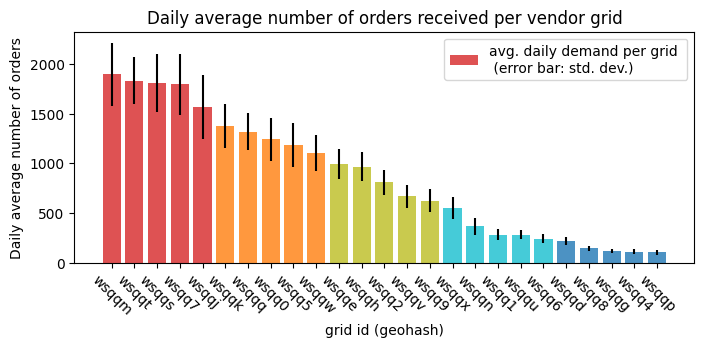

In [62]:
series_mean = series_mean.sort_values(by = ['mean_order_count'], ascending = False)
q1 = np.quantile(series_mean['mean_order_count'], 0.80)
q2 = np.quantile(series_mean['mean_order_count'], 0.60)
q3 = np.quantile(series_mean['mean_order_count'], 0.40)
q4 = np.quantile(series_mean['mean_order_count'], 0.20)
colors = ['tab:red' if value > q1 else 'tab:orange' if value > q2 else 'tab:olive' if value >q3 else 'tab:cyan' if value >q4 else 'tab:blue' for value in series_mean.mean_order_count]
fig, ax = plt.subplots(figsize=(8, 3))
plt.bar(series_mean.vendor_geohash, series_mean.mean_order_count, yerr = series_mean.std_order_count, color=colors, alpha=0.8, label= 'avg. daily demand per grid \n (error bar: std. dev.)')
plt.xticks(rotation=-45)
plt.xlabel('grid id (geohash)')
plt.ylabel('Daily average number of orders')
plt.title('Daily average number of orders received per vendor grid')
plt.legend()
plt.show()

In [63]:
data_train.head(2)

,customer_id,geohash,order_id,vendor_id,day_of_week,order_time,order_day,vendor_geohash,total_items,day,hour,per_15min
0,900f8054db,wsqqe,0,63e62dc1,5,2024-05-17 19:03:01,55 days,wsqqe,0,55,19,0
2,900f8054db,wsqqe,1,f15fbae2,6,2024-05-17 11:13:21,35 days,wsqqe,7,35,11,0


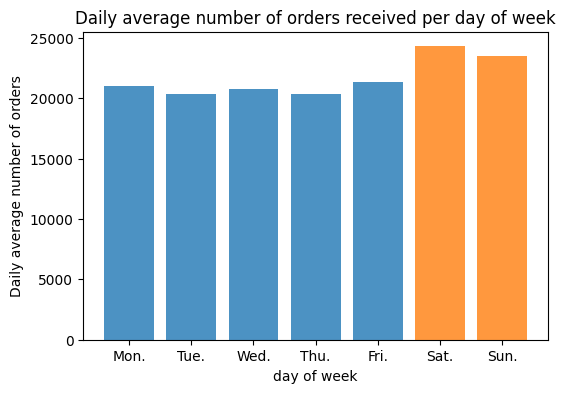

In [64]:
'How to plot the weekly demand pattern of all vendor grids?'
series_3 = data_train.groupby(['day','day_of_week'])['order_id'].count().reset_index()
# series_3 = data_train_15min.groupby(['day','day_of_week'])['order_count'].sum().reset_index()
series_3.columns = ['day','day_of_week','order_count']
series_4 = series_3.groupby(['day_of_week'])['order_count'].mean().reset_index()
series_4.columns = ['day_of_week','mean_order_count']
series_5 = series_3.groupby(['day_of_week'])['order_count'].std().reset_index()
series_5.columns = ['day_of_week','std_order_count']
fig, ax = plt.subplots(figsize=(6, 4))
day_order = ['Mon.','Tue.','Wed.','Thu.','Fri.','Sat.','Sun.']
colors = ['tab:blue', 'tab:blue', 'tab:blue', 'tab:blue', 'tab:blue', 'tab:orange', 'tab:orange']
plt.bar(day_order, series_4.mean_order_count, alpha=0.8, color=colors)
# plt.xticks(rotation=-45)
plt.xlabel('day of week')
plt.ylabel('Daily average number of orders')
plt.title('Daily average number of orders received per day of week')
# plt.legend(loc='upper left')
plt.show()

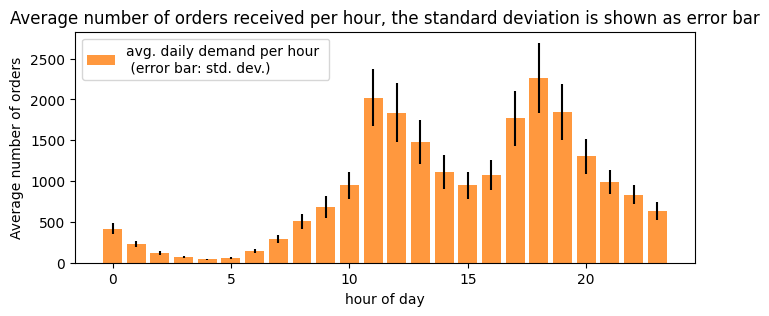

In [65]:
'How to plot the weekly demand pattern of all vendor grids?'
series_3 = data_train.groupby(['day','hour'])['order_id'].count().reset_index()
series_3.columns = ['day','hour','order_count']
series_4 = series_3.groupby(['hour'])['order_count'].mean().reset_index()
series_4.columns = ['hour','mean_order_count']
series_5 = series_3.groupby(['hour'])['order_count'].std().reset_index()
series_5.columns = ['hour','std_order_count']
fig, ax = plt.subplots(figsize=(8, 3))
# day_order = ['Mon.','Tue.','Wed.','Thu.','Fri.','Sat.','Sun.']
plt.bar(series_4.hour, series_4.mean_order_count, alpha=0.8, yerr = series_5.std_order_count, color='tab:orange', label= 'avg. daily demand per hour \n (error bar: std. dev.)')
# plt.xticks(rotation=-45)
plt.xlabel('hour of day')
plt.ylabel('Average number of orders')
plt.title('Average number of orders received per hour, the standard deviation is shown as error bar')
plt.legend(loc='upper left')
plt.show()

In [66]:
len(data_train_15min)

150566

In [67]:
data_train_15min.head(1)

,vendor_geohash,day,day_of_week,hour,per_15min,order_count
0,wsqq0,0,6,0,0,9


In [68]:
'make a dictionary with one column as key and the other column as value'
def make_dict(data, key, value):
    data_dict = dict(zip(data[key], data[value]))
    return data_dict

In [69]:
# How to create a dataframe that contains all combination of geoash, day, day_of_week, hour, per_15min?
def create_all_combinations(data):
    all_geohash = data['vendor_geohash'].unique()
    all_day = data['day'].unique()
    all_hour = data['hour'].unique()
    all_per_15min = data['per_15min'].unique()

    all_combinations = []
    for geohash in all_geohash:
        for day in all_day:
            for hour in all_hour:
                for per_15min in all_per_15min:
                    all_combinations.append([geohash,day,hour,per_15min])
    all_combinations = pd.DataFrame(all_combinations, columns = ['vendor_geohash','day','hour','per_15min'])
    return all_combinations

# train_weekday_dict = make_dict(data_train_15min, 'day', 'day_of_week')
data_train_15min = data_train_15min[data_train_15min['vendor_geohash'].isin(qualified_grids)]
data_train_15min = data_train_15min.sort_values(by = ['day','hour','per_15min','vendor_geohash'])
empty_data = create_all_combinations(data_train_15min)
del data_train_15min['day_of_week']
data_train_15min = pd.merge(empty_data, data_train_15min, on = ['vendor_geohash','day','hour','per_15min'], how = 'left')
data_train_15min = data_train_15min.fillna(0)

In [71]:
# how to create new columne based on the values of other columns using a dictionary?
data_train_15min['day_of_week'] = data_train_15min['day'].map(wd_dict)

In [72]:
data_train_15min.columns

Index(['vendor_geohash', 'day', 'hour', 'per_15min', 'order_count',
       'day_of_week'],
      dtype='object')

In [76]:
print(len(data_test))

356508


In [77]:
# filter data_test_ to only include the top 20 geohash
data_test_ = data_test[data_test['vendor_geohash'].isin(qualified_grids)]
# return data_test_15min
data_test_15min = transform_demand_per15min(data_test_)
print(len(data_test_15min))
data_test_15min.columns = ['vendor_geohash','day','day_of_week','hour','per_15min','order_count']
data_test_15min = data_test_15min.sort_values(by = ['day','hour','per_15min','vendor_geohash'])
empty_data = create_all_combinations(data_test_15min)
del data_test_15min['day_of_week']
data_test_15min = pd.merge(empty_data, data_test_15min, on = ['vendor_geohash','day','hour','per_15min'], how = 'left')
data_test_15min = data_test_15min.fillna(0)
data_test_15min['day_of_week'] = data_test_15min['day'].map(wd_dict_2)
print(len(data_test_15min))

C:\Users\jcheng3\AppData\Local\Temp\ipykernel_24304\3151315762.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['hour'] = data['order_time'].dt.hour
C:\Users\jcheng3\AppData\Local\Temp\ipykernel_24304\3151315762.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['per_15min'] = data['order_time'].dt.minute // 15


Index(['customer_id', 'geohash', 'order_id', 'vendor_id', 'day_of_week',
       'order_time', 'order_day', 'vendor_geohash', 'total_items', 'day',
       'hour', 'per_15min'],
      dtype='object')
28068
33600


In [78]:
print(sum(data_test_15min['order_count']))

355912.0


In [79]:
data_test_15min.head()

,vendor_geohash,day,hour,per_15min,order_count,day_of_week
0,wsqq0,76,0,0,11.0,5
1,wsqq0,76,0,1,11.0,5
2,wsqq0,76,0,2,3.0,5
3,wsqq0,76,0,3,13.0,5
4,wsqq0,76,1,0,4.0,5


In [83]:
data_train_15min.to_csv('Data/data_train_15min.csv', index = False)
data_test_15min.to_csv('Data/data_test_15min.csv', index = False)

In [81]:
hist_mean = data_train_15min.groupby(['day_of_week','hour'])['order_count'].mean().reset_index()
hist_mean.columns = ['day_of_week','hour','hist_mean']
hist_mean

,day_of_week,hour,hist_mean
0,0,0,3.930909
1,0,1,2.149091
2,0,2,1.095455
3,0,3,0.624545
4,0,4,0.406364
...,...,...,...
163,6,19,20.380909
164,6,20,13.882727
165,6,21,10.131818
166,6,22,8.173636


In [28]:
df_train = pd.merge(data_train_15min, hist_mean, on = ['day_of_week','hour'], how = 'left')
print(df_train[pd.isnull(df_train).any(axis=1)])

Empty DataFrame
Columns: [vendor_geohash, day, hour, per_15min, order_count, day_of_week, hist_mean]
Index: []


In [29]:
df_test = pd.merge(data_test_15min, hist_mean, on = ['day_of_week','hour'], how = 'left')
print(df_test[pd.isnull(df_train).any(axis=1)])

Empty DataFrame
Columns: [vendor_geohash, day, hour, per_15min, order_count, day_of_week, hist_mean]
Index: []


C:\Users\jcheng3\AppData\Local\Temp\ipykernel_24304\1966202947.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print(df_test[pd.isnull(df_train).any(axis=1)])


In [ ]:
def histroy_avg(df_train, df_test):
    hist_mean = df_train.groupby(['day_of_week','hour'])['counts'].mean().reset_index()
    hist_mean.columns = ['day_of_week','hour','hist_mean']
    df_train = pd.merge(df_train, hist_mean, on = ['day_of_week','hour'], how = 'left')
    df_test = pd.merge(df_test, hist_mean, on = ['day_of_week','hour'], how = 'left')
    pred_train = df_train['hist_mean'].values
    pred_test = df_test['hist_mean'].values
    print(df_test[pd.isnull(df_test).any(axis=1)])
    # print('NaN in pred of training set', np.count_nonzero(np.isnan(pred_train)))
    # print('NaN in pred of testing set', np.count_nonzero(np.isnan(pred_test)))
    return pred_train, pred_test

# Visualization

In [36]:
data_train_15min.head(2)

,vendor_geohash,day,hour,per_15min,day_of_week,order_count
0,wsqq0,0,0,0,6.0,9.0
1,wsqq0,0,0,1,6.0,6.0


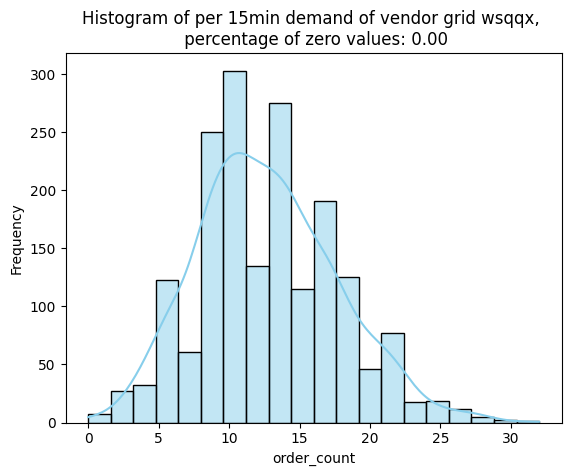

In [44]:
import seaborn as sns

grid_id = 'wsqqx'
df_sample = data_train_15min[data_train_15min.vendor_geohash == grid_id]
# peak hours only
df_sample = df_sample[df_sample.hour.isin([11,12,13,17,18,19])]

# how to know what is the percentage of zero values in the order_count column?
zero_count = len(df_sample[df_sample.order_count == 0])
total_count = len(df_sample)
percentage = zero_count / total_count

# Assuming you have a pandas DataFrame df and you want to plot the histogram of the column 'column_name'
sns.histplot(data=df_sample, x='order_count', kde=True, color='skyblue', bins=20)

plt.title(f'Histogram of per 15min demand of vendor grid {grid_id}, \n percentage of zero values: {percentage:.2f}')
plt.xlabel('order_count')
plt.ylabel('Frequency')

plt.show()

In [57]:
df_sample_zero = df_sample[df_sample.order_count == 0]
df_sample_zero.head(50)

,vendor_geohash,day,day_of_week,hour,per_15min,order_count
140,wsqq0,0,0,11,0,0.0
141,wsqq0,0,0,11,1,0.0
142,wsqq0,0,0,11,2,0.0
143,wsqq0,0,0,11,3,0.0
144,wsqq0,0,0,12,0,0.0
145,wsqq0,0,0,12,1,0.0
146,wsqq0,0,0,12,2,0.0
147,wsqq0,0,0,12,3,0.0
148,wsqq0,0,0,13,0,0.0
149,wsqq0,0,0,13,1,0.0


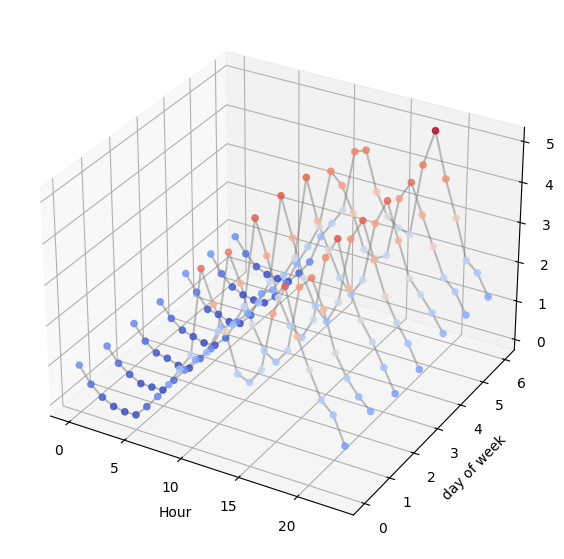

In [44]:
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cm

df_sample = data_train_15min[data_train_15min.vendor_geohash == 'wsqq0']
df_sample.columns = ['vendor_geohash','day','day_of_week','hour','per_15min','per_15_demand']
df_avg_demand = df_sample.groupby(['day_of_week', 'hour'])['per_15_demand'].mean().reset_index()

# Create the figure and 3D axis
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Normalize the 'per_15_demand' for the color mapping
norm = plt.Normalize(df_avg_demand['per_15_demand'].min(), df_avg_demand['per_15_demand'].max())
colors = cm.viridis(norm(df_avg_demand['per_15_demand'].values))

# Plotting the 3D scatter plot with transparency
for day in df_avg_demand['day_of_week'].unique():
    # Extract the data for this day
    day_data = df_avg_demand[df_avg_demand['day_of_week'] == day].sort_values('hour')
    # Create the color array for the day
    day_colors = cm.coolwarm(norm(day_data['per_15_demand'].values))
    # Plot a line for each weekday
    ax.plot(day_data['hour'], [day] * len(day_data), day_data['per_15_demand'], color='grey', alpha=0.5 , zorder=1)
    # Scatter plot for each weekday
    ax.scatter(day_data['hour'], [day] * len(day_data), day_data['per_15_demand'], c=day_colors, marker='o', alpha=0.8, zorder=2)

# Set the labels for the axes
ax.set_xlabel('Hour')
ax.set_ylabel('day of week')
ax.set_zlabel('Avg per 15-min Demand')

# Set the y ticks to correspond to weekdays
ax.set_yticks(np.arange(min(df_avg_demand['day_of_week']), max(df_avg_demand['day_of_week'])+1))

# Add a color bar which maps values to colors
mappable = cm.ScalarMappable(norm=norm, cmap=cm.coolwarm)
mappable.set_array(df_avg_demand['per_15_demand'])

# Show the plot
plt.show()

In [33]:
'folium visualization'
import folium
from folium.plugins import HeatMap
# from folium.plugins import HeatMapWithTime

# Assuming you have a list of geohashes
geohashes = ['wsqqm', 'wsqqt', 'wsqqs', 'wsqqk', 'wsqq7', 'wsqqj', 'wsqqq', 
          'wsqqw', 'wsqqe', 'wsqq5', 'wsqqh', 'wsqq0', 'wsqq2', 'wsqqv', 
          'wsqq9', 'wsqqx', 'wsqq6', 'wsqqn', 'wsqq1', 'wsqqd']

# Create a map centered at the first geohash
lat, lon = geohash.decode(geohashes[10])
m = folium.Map(location=[lat, lon], zoom_start=11)

# Add a polygon for each geohash
for geohash_code in geohashes:
    # Get the boundaries of the geohash
    lat, lon, lat_err, lon_err = geohash.decode_exactly(geohash_code)
    # Create the polygon corners
    corners = [(lat - lat_err, lon - lon_err), (lat - lat_err, lon + lon_err),
               (lat + lat_err, lon + lon_err), (lat + lat_err, lon - lon_err)]
    # Add the polygon to the map
    folium.Polygon(corners, color="red").add_to(m)

# Display the map
m
# heatmap of the geohash?
# # Create a list of the latitudes and longitudes
# lats = [geohash.decode(gh)[0] for gh in geohashes]
# lons = [geohash.decode(gh)[1] for gh in geohashes]
# # Create a list of the number of orders at each geohash
## orders = [len(_data_train[_data_train['geohash'] == gh]) for gh in geohashes]
# orders = [len(_data_test_[_data_test_['geohash'] == gh]) for gh in geohashes]

# # heatmap
# HeatMap(list(zip(lats, lons, orders)), radius=15).add_to(m)

In [3]:
data_train = pd.read_csv('Data/data_train_15min.csv')
data_test = pd.read_csv('Data/data_test_15min.csv')
# transform geohash into latitude and longitude
data_train['lat'] = data_train['geohash'].apply(lambda x: geohash.decode(x)[0])
data_train['lng'] = data_train['geohash'].apply(lambda x: geohash.decode(x)[1])
data_test['lat'] = data_test['geohash'].apply(lambda x: geohash.decode(x)[0])
data_test['lng'] = data_test['geohash'].apply(lambda x: geohash.decode(x)[1])

In [ ]:
# how to visualize the distribution of orders in the training data? note that the number of order counted per 15min is record in order_count column
data_train['order_count'].describe()

In [ ]:
'example to create hour dynamic heat map'
# df_hour_list = [] # create blank list
# df['count'] = 1
# # loop through each hour
# for hour in df['start_Hour'].sort_values().unique():
#     df_hour_list.append(df.loc[df['start_Hour'] == hour, # for each hour append to list
#     ['start_lat', 'start_lng', 'count']]\
#     .groupby(['start_lat', 'start_lng'])\
#     .sum().reset_index().values.tolist()) #sum totals per station, reset index and create list

# time_index = []
# for i in df['start_Hour'].sort_values().unique():
#     time_index.append(i)

# #Choosing the map type
# m = folium.Map(location=[38.90,-77.05],zoom_start = 11)

# #Plot it on the map
# for i in range(len(wmata_station_df)):
#   folium.Circle(
#                 radius=50,
#                 location=[latitudes[i], longitudes[i]],
#                 color='blue',
#                 fill=False).add_to(m)


# HeatMapWithTime(df_hour_list,
#                 radius=11,
#                 index=time_index,
#                 # gradient={0.1: 'blue', 0.5: 'lime', 0.7: 'orange', 1: 'red'},
#                 min_opacity=0.2,
#                 max_opacity=0.7,
#                 auto_play=True,
#                 use_local_extrema=True
#                 ).add_to(m)
# # Display the map
# m

In [ ]:
data_train.head()

,Unnamed: 0,customer_id,geohash,order_id,vendor_id,product_id,day_of_week,order_time,order_day,lat,lon
0,0,900f8054db,wsqqe,0,63e62dc1,51474e8ecf99,5,11:03:01,55 days,25.1,121.4
1,1,900f8054db,wsqqe,0,63e62dc1,7576b2eab768,5,11:03:01,55 days,25.1,121.4
2,2,900f8054db,wsqqe,1,f15fbae2,1452f0fd3ada,6,03:13:21,35 days,25.1,121.4
3,3,900f8054db,wsqqe,1,f15fbae2,1f3e3644c180,6,03:13:21,35 days,25.1,121.4
4,4,900f8054db,wsqqe,1,f15fbae2,8b995e631939,6,03:13:21,35 days,25.1,121.4


# Plots generation

In [3]:
data_train = pd.read_csv('Data/data_train_15min.csv')
data_train.head()

,vendor_geohash,day,hour,per_15min,order_count,day_of_week
0,wsqq0,0,0,0,9.0,6
1,wsqq0,0,0,1,6.0,6
2,wsqq0,0,0,2,6.0,6
3,wsqq0,0,0,3,8.0,6
4,wsqq0,0,1,0,2.0,6


In [4]:
sum(data_train['order_count'])

1640371.0

In [5]:
# average demand per day
data_train_daily = data_train.groupby(['day','day_of_week'])['order_count'].sum().reset_index()
data_train_daily.order_count.describe()

count       76.000000
mean     21583.828947
std       3352.445871
min      11554.000000
25%      19127.750000
50%      21258.000000
75%      23568.250000
max      29457.000000
Name: order_count, dtype: float64

In [6]:
data_test = pd.read_csv('Data/data_test_15min.csv')
data_test_daily = data_test.groupby(['day','day_of_week'])['order_count'].sum().reset_index()
data_test_daily.order_count.describe()

count       14.000000
mean     25422.285714
std       2651.714378
min      22226.000000
25%      23018.000000
50%      25081.500000
75%      28166.500000
max      29302.000000
Name: order_count, dtype: float64

In [7]:
len(data_test.vendor_geohash.unique())

25

In [8]:
data_test.columns

Index(['vendor_geohash', 'day', 'hour', 'per_15min', 'order_count',
       'day_of_week'],
      dtype='object')

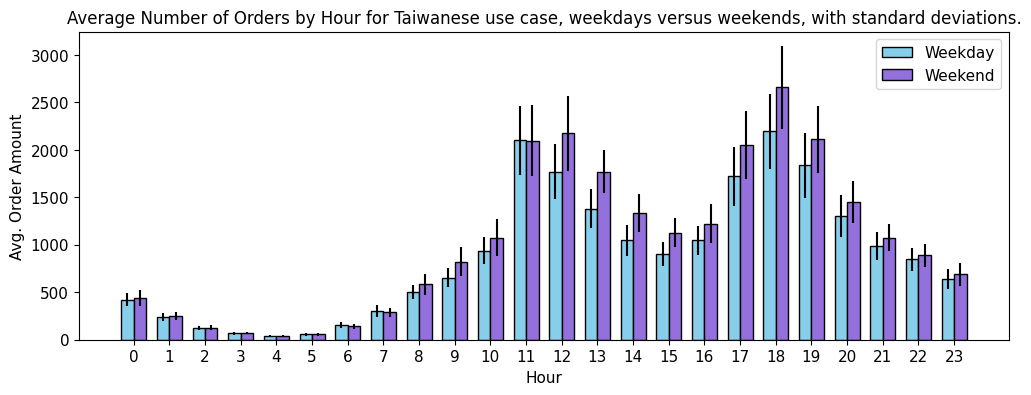

In [9]:
'combine training and testing data'
data = pd.concat([data_train, data_test], axis = 0)
# data.columns = ['vendor_geohash', 'day', 'hour', 'per_15min', 'order_count','day_of_week']
weekend = [5,6,7]
weekday = [1,2,3,4]
data_weekday = data[data['day_of_week'].isin(weekday)]
data_weekday = data_weekday.groupby(['day','hour'])['order_count'].sum().reset_index()
data_weekend = data[data['day_of_week'].isin(weekend)]
data_weekend = data_weekend.groupby(['day','hour'])['order_count'].sum().reset_index()

# Aggregate the data to get the average order count per hour
avg_orders_weekday = data_weekday.groupby('hour')['order_count'].mean()
avg_orders_weekend = data_weekend.groupby('hour')['order_count'].mean()

# Create a bar plot
fig, ax = plt.subplots(figsize=(12, 4))

width = 0.35  # Width of the bars
hours = np.arange(0, 24)  # Hours from 10 to 21

# Plot the bars
bars1 = ax.bar(hours - width/2, avg_orders_weekday, width, label='Weekday', color='skyblue', edgecolor='black', yerr=data_weekday.groupby('hour')['order_count'].std())
bars2 = ax.bar(hours + width/2, avg_orders_weekend, width, label='Weekend', color='mediumpurple', edgecolor='black', yerr=data_weekend.groupby('hour')['order_count'].std())

# Add labels and title
ax.set_xlabel('Hour', fontsize=11)
ax.set_ylabel('Avg. Order Amount', fontsize=11)
ax.set_title('Average Number of Orders by Hour for Taiwanese use case, weekdays versus weekends, with standard deviations.')
ax.set_xticks(hours)
ax.tick_params(axis='x', labelsize=11)
ax.tick_params(axis='y', labelsize=11) 
ax.legend(fontsize=11)

# Show the plot
plt.show()



In [10]:
data.columns

Index(['vendor_geohash', 'day', 'hour', 'per_15min', 'order_count',
       'day_of_week'],
      dtype='object')

In [25]:
# check for each OrZone, how many percentage of values under counts column are zero
total_counts = data.groupby('vendor_geohash')['order_count'].count()
zero_counts = data[data['order_count'] == 0].groupby('vendor_geohash')['order_count'].count()
zero_ratio = zero_counts/total_counts

In [27]:
np.max(zero_ratio.values)

0.480787037037037

In [28]:
np.mean(zero_ratio.values)

0.18342129629629628

In [29]:
np.median(zero_ratio.values)

0.13275462962962964

In [15]:
data_lunch = data[(data['hour'] >= 11) & (data['hour'] <= 13)]
data_dinner = data[(data['hour'] >= 17) & (data['hour'] <= 20)]

In [18]:
avg_demand_lunch = data_lunch.groupby(['vendor_geohash'])['order_count'].mean().reset_index()
avg_demand_dinner = data_dinner.groupby(['vendor_geohash'])['order_count'].mean().reset_index()

In [22]:
avg_demand_day = data.groupby(['vendor_geohash'])['order_count'].mean().reset_index()

In [20]:
avg_demand_lunch.to_csv('Data/avg_demand_lunch.csv', index = False)
avg_demand_dinner.to_csv('Data/avg_demand_dinner.csv', index = False)

In [23]:
avg_demand_day.to_csv('Data/avg_demand_day.csv', index = False)